# Analyzing a soft drink (PCA, Dendrogramm)

## setup 

run `nohup jupyter notebook &` on the raspy. The settings are saved on ~/.jupyter/jupyter_notebook_config.py.

log into the interactive session on the client pc by using firefox and the adress "http://192.168.40.112:8888"

navigate to the correct folder in order to load some of the modules I made.


In [1]:
## loading the pacakges
import warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=UserWarning)
    from read_sensor import read_data
    from datetime import datetime as dt
    import sys
    import pickle
    import os
    import pandas as pd
    import numpy as np
    from sklearn.decomposition import PCA
    from scipy.cluster.hierarchy import dendrogram, linkage
    import matplotlib.pyplot as plt


In [2]:
[file for file in os.listdir() if file.endswith('.pickle')]

['data.pickle', '20250804_data_safe.pickle']

## loading previously stored data

In [3]:
# loading previous data
db_name =  '20250804_data_safe.pickle'
if os.path.exists( db_name ):
    print("loading previous data")
    with open( db_name , "rb" ) as f:
        data_stored = pickle.load( f )


df_data = {}

for k, val in data_stored.items():
    column_data = {}
    for channel, data in val.items():
        column_data[channel] = np.mean(data)
    df_data[k] = column_data

df = pd.DataFrame(df_data)

df_transposed = df.T
df_transposed.columns = [f'sensor_{i}' for i in range(df_transposed.shape[1])] # Rename columns for clarity
df_transposed

loading previous data


,sensor_0,sensor_1,sensor_2
20250803_water_tap,103.06,785.72,762.74
20250803_water_sm,17.98,935.28,959.60
20250803_tea,241.36,783.58,781.52
20250803_pocari,714.04,756.32,748.30
20250803_coffee,459.02,783.06,791.20
20250803_cola,319.72,791.20,793.80
20250803_pepsi,408.22,776.20,769.70
20250803_grapfruit_juice,730.16,786.82,790.90
20250803_mango,686.00,774.58,786.26
20250803_coffee_sugar,380.56,790.04,778.18


## plotting the previously stored data

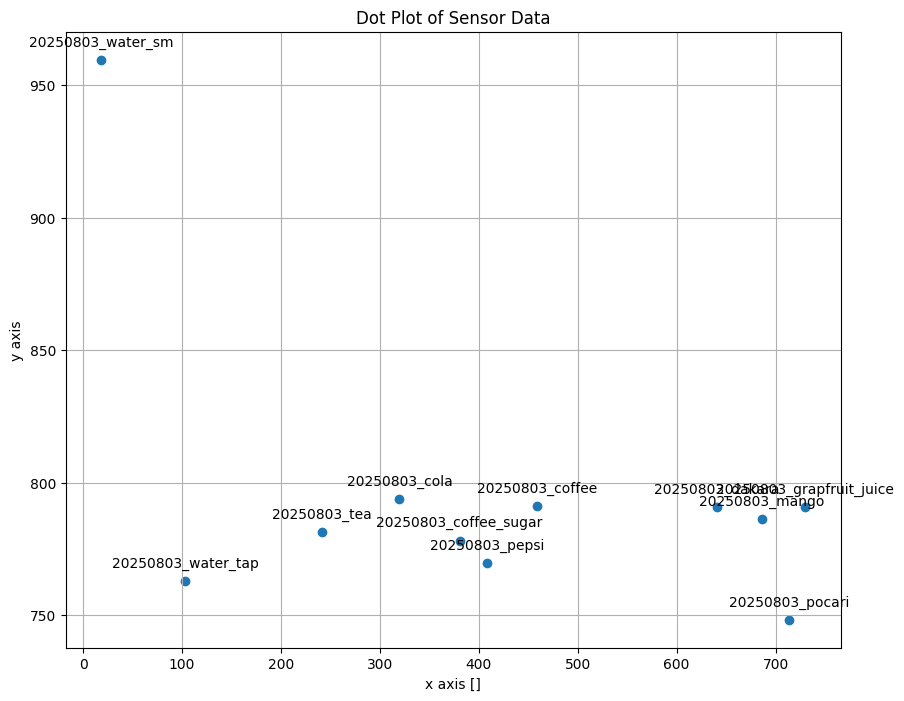

In [4]:
plt.figure(figsize=(10, 8)) 
# Create the scatter plot
plt.scatter(df_transposed['sensor_0'],
            df_transposed['sensor_2']) 
# Label each point with the corresponding name
for i, name in enumerate(df_transposed.index):
    plt.annotate(name, (df_transposed['sensor_0'].iloc[i],
                        df_transposed['sensor_2'].iloc[i]),
                 textcoords="offset points", xytext=(0, 10), ha='center')

# Add titles and labels
plt.title('Dot Plot of Sensor Data')
plt.xlabel('x axis []')
plt.ylabel('y axis')
plt.grid(True)
plt.show()

## Measuring data from the sensor

### how to name our new datapoint?

In [5]:
sample_name = "20250923_lemonwater"
#time_ = dt.now().strftime("%Y%m%d_%H%M%S")
df_transposed.loc[sample_name] = read_data()

### this is our new data point

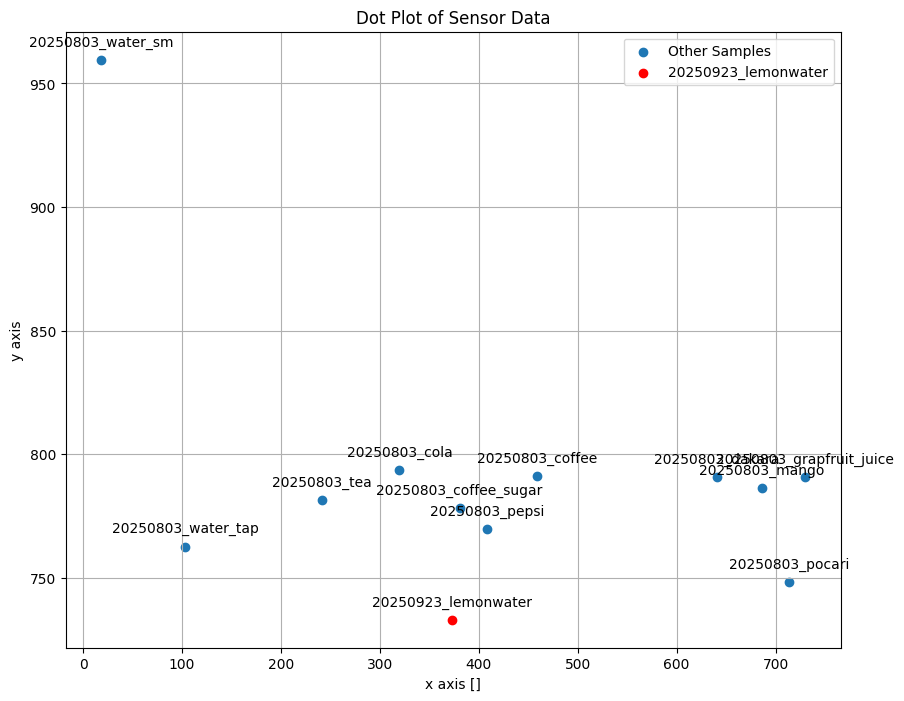

In [6]:
# Separate the data into two groups
df_highlight = df_transposed.loc[[sample_name]]
df_rest = df_transposed.drop(sample_name)

plt.figure(figsize=(10, 8))

# Plot the rest of the data in a default color (e.g., blue)
plt.scatter(df_rest['sensor_0'], df_rest['sensor_2'], label='Other Samples')

# Plot the highlighted data point in a different color (e.g., red)
plt.scatter(df_highlight['sensor_0'], df_highlight['sensor_2'], color='red', label=sample_name)

# Label each point with the corresponding name
for i, name in enumerate(df_transposed.index):
    plt.annotate(name, (df_transposed['sensor_0'].iloc[i], df_transposed['sensor_2'].iloc[i]),
                 textcoords="offset points", xytext=(0, 10), ha='center')

# Add titles and labels
plt.title('Dot Plot of Sensor Data')
plt.xlabel('x axis []')
plt.ylabel('y axis')
plt.grid(True)
plt.legend()  # Show the legend to identify the colors
plt.show()

## simple machine learning

### principle component analysis


Explained variance ratio for each component (on transposed data):
[0.93223266 0.06705424]


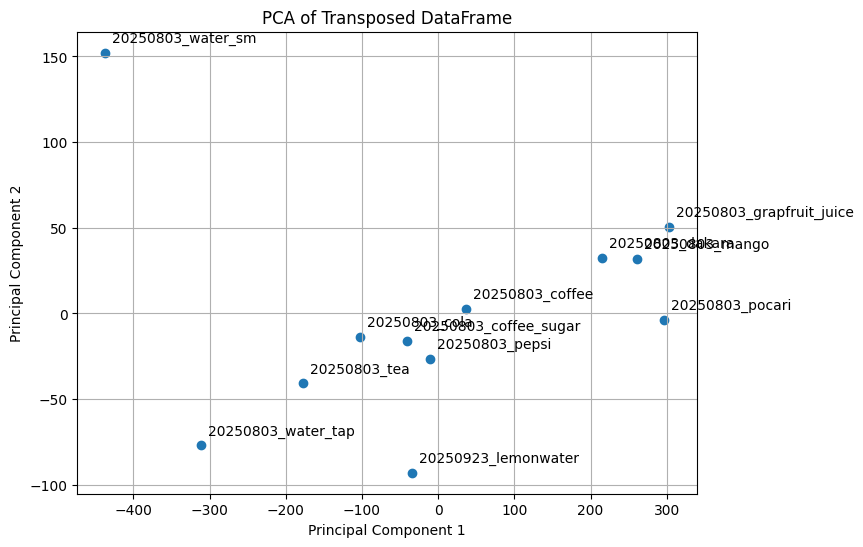

In [7]:
pca = PCA(n_components=2)
principal_components_transposed = pca.fit_transform(df_transposed)

# Create a DataFrame for the principal components
pca_df_transposed = pd.DataFrame(data=principal_components_transposed,
                                 columns=['Principal Component 1', 'Principal Component 2'],
                                index = df_transposed.index)

# Print the explained variance ratio
print("\nExplained variance ratio for each component (on transposed data):")
print(pca.explained_variance_ratio_)

# Plotting the PCA results
plt.figure(figsize=(8, 6))
plt.scatter(pca_df_transposed['Principal Component 1'], pca_df_transposed['Principal Component 2'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Transposed DataFrame')
plt.grid(True)

# Add labels to each point
for i, label in enumerate(pca_df_transposed.index):
    plt.annotate(label,
                 (pca_df_transposed['Principal Component 1'].iloc[i],
                  pca_df_transposed['Principal Component 2'].iloc[i]),
                 textcoords="offset points",
                 xytext=(5,5),
                 ha='left',
                 va='bottom')

### hierachical clustering

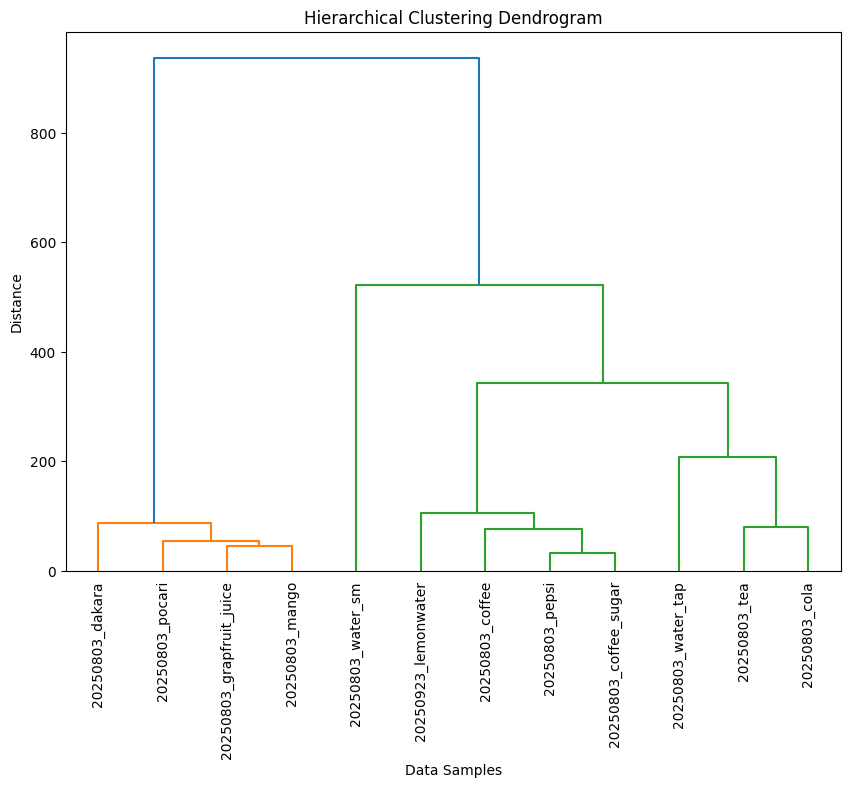

In [8]:
Z = linkage(df_transposed, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z, labels=df_transposed.index, leaf_rotation=90, leaf_font_size=10)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Samples')
plt.ylabel('Distance')
plt.show()